<a href="https://colab.research.google.com/github/Furankyyy/CS146-Modern-Computational-Statistics/blob/master/CS146_13_2_MCMC_Preclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def p(x):
    return sts.norm.pdf(x,loc=-4,scale=0.5)+sts.norm.pdf(x,loc=4,scale=1)

# proposal distribution
def q(x,e):
    return sts.norm.rvs(loc=x,scale=e)

Since our proposal distribution is symmetric, it is a lot easier to compute $\alpha$, the acceptance rate, because $q(x_{t+1}|x_t)=q(x_t|x_{t+1})$ since $N(x_{t+1}|x_t,\epsilon)=N(x_{t}|x_{t+1},\epsilon)$.

In [0]:
def MCMC(p,q,e,size=1000):
    x = np.random.uniform(-6,8) # based on what we know of p(x), this value is actually not important because the markov chain will find its way to the distribution
    result = [x]
    for t in range(size-1):
        xt = q(x,e) # generate potential next sample using proposal distribution
        alpha = p(xt)/p(x) # calculate acceptance
        if np.random.random() < min(1,alpha):
            x = xt
        result.append(x)
    return result

In [0]:
def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal

    plt.acorr(x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

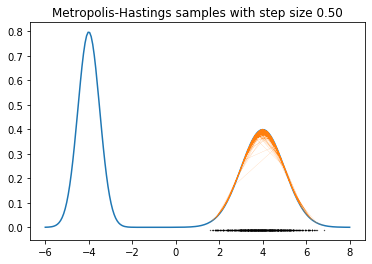

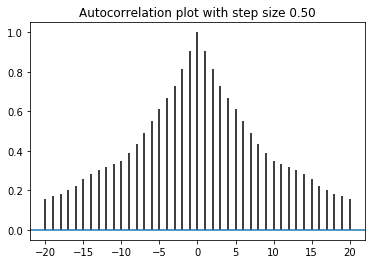

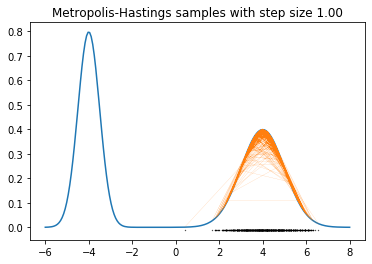

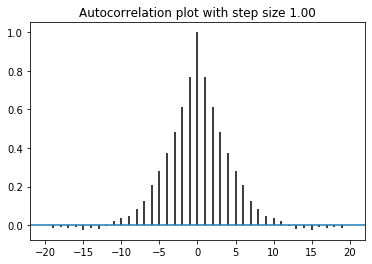

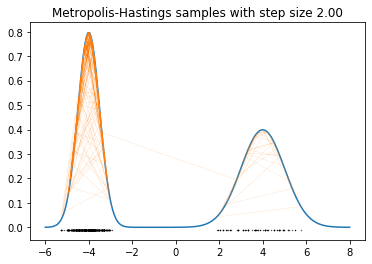

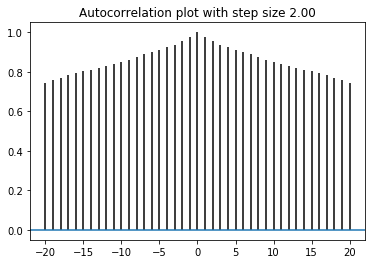

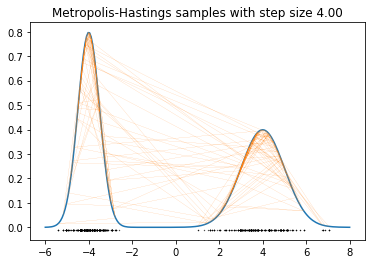

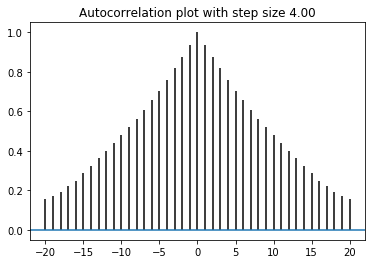

In [0]:
for e in [0.5,1,2,4]:
    samples = MCMC(p,q,e,size=1000)
    x = np.linspace(-6,8,200)
    plt.plot(x,p(x))
    plt.plot(samples,p(samples),linewidth=0.1)
    plt.scatter(samples,[-0.01 for _ in range(1000)],s=0.1,c='black')
    plt.title('Metropolis-Hastings samples with step size %.2f' % e)
    plt.show()
    plot_acf(samples)
    plt.title('Autocorrelation plot with step size %.2f' % e)
    plt.show()

We can see that when $\epsilon = 4$ there are a lot of walks between the peaks, whereas for smaller values the markov chain tend to stay in one place. Unfortunately autocorrelation is high for all of the $\epsilon$ values.